# Zadanie 1

In [3]:
bits(Float32(1.0/3.0))

"00111111100000000000000000000000"

In [6]:
bits(Float64(1.0/3.0))

"0011111111010101010101010101010101010101010101010101010101010101"

In [8]:
bits(convert(Float64, Float32(1.0/3.0)))

"0011111111010101010101010101010101100000000000000000000000000000"


# Zadanie 2

In [2]:
using Plots

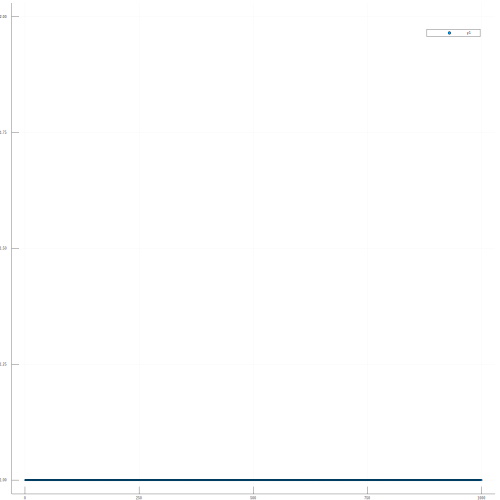

In [3]:
diff = Array{Float32}(0)
num = Float32(1.0)
for x in 1:1000
    inc_num = num + Float32(1.0)
    push!(diff, (inc_num * 1000.0 - num * 1000.0) / 1000.0)
    num = inc_num
end
scatter(1:1:1000, diff, size=(2000, 2000))

# Zadanie 3

In [25]:
a=Float32(1.1)
for i=1:150
    a=a/Float32(2.0)
    println(a, "    ",  bits(a), "    ", issubnormal(a))
end

0.55    00111111000011001100110011001101    false
0.275    00111110100011001100110011001101    false
0.1375    00111110000011001100110011001101    false
0.06875    00111101100011001100110011001101    false
0.034375    00111101000011001100110011001101    false
0.0171875    00111100100011001100110011001101    false
0.00859375    00111100000011001100110011001101    false
0.004296875    00111011100011001100110011001101    false
0.0021484375    00111011000011001100110011001101    false
0.0010742188    00111010100011001100110011001101    false
0.0005371094    00111010000011001100110011001101    false
0.0002685547    00111001100011001100110011001101    false
0.00013427735    00111001000011001100110011001101    false
6.713867e-5    00111000100011001100110011001101    false
3.3569337e-5    00111000000011001100110011001101    false
1.6784668e-5    00110111100011001100110011001101    false
8.392334e-6    00110111000011001100110011001101    false
4.196167e-6    00110110100011001100110011001101    

### Jak widać gdy zchodzimy poniżej zakresu liczby 32 bitowej, wszystkie bity cechy mają wartość 0, a mantysa jest niezerowa.
### Ostatnia wartość to 2^(-23) 2^(-126) = 2^(-149) czyli około 1 * 10^(-45), później przekraczamy zakres i liczby stają się zerowe.

# Zadanie 4

In [13]:
function solve_quadratic_unstable(a, b, c)
    delta = b^2 - 4*a*c
    delta >= 0 ?   ( (-b + sqrt(delta))/(2a), (-b - sqrt(delta))/(2a) ) : error("Zespolone pierwiastki")
end

solve_quadratic_unstable (generic function with 1 method)

In [12]:
function solve_quadratic_stable(a, b, c)
    delta = b^2 - 4*a*c
    x1 = 0
    x2 = 0
    if delta < 0 
        error("Only complex roots")
    end
    if b >= 0
        x2 = (-b - sqrt(delta))/(2a)
        x1 = c / (a * x2)
    else
        x1 = (-b + sqrt(delta))/(2a)
        x2 = c / (a * x1)
    end
    
    return (x1, x2)
end

solve_quadratic_stable (generic function with 1 method)

In [18]:
a = 1.0
b = 2.0
c = 1.0

unstable = unstable_quadratic(a, b, c)
println("niestabilna: $unstable")

stable = stable_quadratic(a, b, c)
println("stabilna: $stable")

println(string("równe wyniki?: ", unstable == stable))

niestabilna: (-1.0, -1.0)
stabilna: (-1.0, -1.0)
równe wyniki?: true


In [19]:
a = 1.0
b = 4.0
c = 1.0

unstable = unstable_quadratic(a, b, c)
println("niestabilna: $unstable")

stable = stable_quadratic(a, b, c)
println("stabilna: $stable")

println(string("równe wyniki?: ", unstable == stable))

niestabilna: (-0.2679491924311228, -3.732050807568877)
stabilna: (-0.2679491924311227, -3.732050807568877)
równe wyniki?: false
